In [12]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [13]:
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np

Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [14]:
# 输入研究区的shp文件所在路径
wuhan_shp ="D:/NDVI_exercise/wuhan/wuhanregion.shp"
# shp 转 ee 
wuhan_ee = geemap.shp_to_ee(wuhan_shp)
# 添加到layer
Map.addLayer(wuhan_ee,{},"wuhan")
Map.centerObject(wuhan_ee,7)   # 设置以研究区居中

# acquire  area of wuhan's water monthly in 2012

In [15]:
#  设定计算的年份
year = 2015

In [16]:
month = np.arange(1,13,1)
waterArea = []
# 定义一些变量
days_31 = [1,3,5,7,8,10,12]
days_30 = [4,6,9,11]
days_28 = [2]
for i in range(1,13,1):
    if i in days_31:
        water_data = ee.ImageCollection('JRC/GSW1_2/MonthlyHistory').filterDate('{}-{}-01'.format(year,i),'{}-{}-31'.format(year,i)).first()
    elif i in days_30:
        water_data = ee.ImageCollection('JRC/GSW1_2/MonthlyHistory').filterDate('{}-{}-01'.format(year,i),'{}-{}-30'.format(year,i)).first()
    else:
        water_data = ee.ImageCollection('JRC/GSW1_2/MonthlyHistory').filterDate('{}-{}-01'.format(year,i),'{}-{}-28'.format(year,i)).first()
    water = water_data.eq(2).selfMask().multiply(ee.Image.pixelArea()).divide(1e6)
    areas = water.reduceRegion(**{
      'reducer': ee.Reducer.sum(),
      'geometry': wuhan_ee.geometry(),
      'scale': 30,
      'maxPixels': 1e14
    })
    waterArea.append(areas.get('water').getInfo())
#     print(areas.getInfo())

In [17]:
meanArea = np.mean(waterArea)
print(meanArea)

714.9721182544577


In [18]:
water_data = ee.Image("JRC/GSW1_2/YearlyHistory/{}".format(year))
water = water_data.eq(3).selfMask().multiply(ee.Image.pixelArea()).divide(1e6)
areas = water.reduceRegion(**{
      'reducer': ee.Reducer.sum(),
      'geometry': wuhan_ee.geometry(),
      'scale': 30,
      'maxPixels': 1e14
})
permanent_waterArea = areas.get('waterClass').getInfo()
print(permanent_waterArea)

742.8197875795443


In [19]:
RF_waterArea = [1919.497917566903, 172.6789292320062, 0,178.78891883924243, 0,462.3357181844747, 803.3744604714041, 954.7123528474002, 817.0491499024548, 1039.7974312507413, 1126.3098211173071,0]

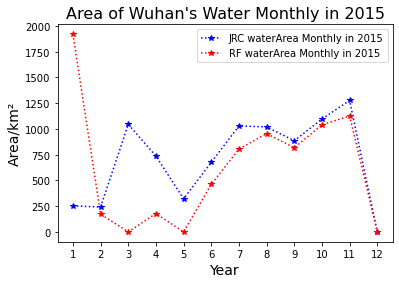

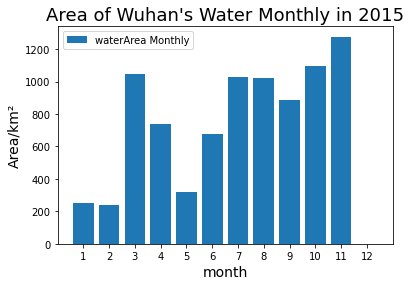

In [20]:
# plot Wuhan's Water Monthly in 2013 （折线图）
plt.title("Area of Wuhan's Water Monthly in {}".format(year), fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Area/km²', fontsize=14)
plt.plot(month, waterArea,'*:b' ,label = 'JRC waterArea Monthly in {}'.format(year))
plt.plot(month, RF_waterArea,'*:r' ,label = 'RF waterArea Monthly in {}'.format(year))
# 绘制'year'年间的永久水体（permanent water）面积
# plt.axhline( permanent_waterArea,ls = '--',label = 'permanent waterArea in Year')
# 每个月份都显示，在横轴
plt.xticks(month)
plt.legend()
plt.show()

# plot Wuhan's Water Monthly in 2013 （柱状图）
plt.title("Area of Wuhan's Water Monthly in {}".format(year), fontsize=18)
plt.xlabel("month", fontsize=14)
plt.ylabel('Area/km²', fontsize=14)
plt.bar(month, waterArea ,label = 'waterArea Monthly')
# 每个月份都显示，在横轴
plt.xticks(month)
plt.legend()
plt.show()


In [ ]:
water = ee.ImageCollection('JRC/GSW1_2/MonthlyHistory').filterDate('2018-02-01','2018-02-28').first().clip(wuhan_ee)
visualization = {
    'bands': ['water'],
    'min': 0.0,
    'max': 2.0,
    'palette': ['ffffff', 'fffcb8', '0905ff']
};
Map.addLayer(water,visualization,'wuhan')

In [ ]:
Map